In [132]:
import requests
import time
from urllib.parse import quote
import pandas as pd
import urllib.request
import sys
import urllib.request
import os

client_id = 'XmAPiOuFA_rJ7TcZTHK0'
client_secret = '86fJUY5PW8'
headers = {'X-Naver-Client-Id':client_id, 'X-Naver-Client-Secret':client_secret}
url_base="https://openapi.naver.com/v1/search/blog.json?query="
keyword = '용산맛집'
# quote(input("검색 키워드를 입력하세요. : "))
print(keyword)
keyword_number=input("몇 번째부터 검색할까요? : ")
display=input("몇 개까지 검색할까요? : ")
print(sys.stdin.encoding)

parameters = "?query = %s&start=%s&display=%s" %(urllib.parse.quote(keyword), keyword_number, display)
url = url_base + parameters
print(url)
result = requests.get(url,headers = headers).json()                  #결과값을 변수로 지정
result

용산맛집
몇 번째부터 검색할까요? : 1
몇 개까지 검색할까요? : 150
cp949
https://openapi.naver.com/v1/search/blog.json?query=?query = %EC%9A%A9%EC%82%B0%EB%A7%9B%EC%A7%91&start=1&display=150


{'errorMessage': 'Invalid display value (부적절한 display 값입니다.)',
 'errorCode': 'SE02'}

In [108]:
type(result)

dict

In [109]:
result['display']

KeyError: 'display'

In [110]:
data = result['items']
data

KeyError: 'items'

In [111]:
total_row =[]
one_row = []
for i in range(result['display']):
    title = data[i]['title']
    link = data[i]['link']
    description = data[i]['description']
    bloggername = data[i]['bloggername']
    bloggerlink = data[i]['bloggerlink']
    postdate = data[i]['postdate']
    one_row.append(title)
    one_row.append(link)
    one_row.append(description)
    one_row.append(bloggername)
    one_row.append(bloggerlink)
    one_row.append(postdate)
    print(one_row)
    total_row.append(one_row)
    print('전체기사수 >> ', len(total_row))
    

KeyError: 'display'

In [112]:
import pickle
import pandas as pd
import numpy as np

In [113]:
data

[{'title': 'JUN (6) : Baton meal cafe 바통 / <b>용산맛집</b> / <b>용산</b>카페... ',
  'link': 'https://blog.naver.com/toomyung_?Redirect=Log&logNo=221995873388',
  'description': '#<b>용산</b>카페 #<b>용산</b>브런치 #바통 #브런치<b>맛집</b> #브런치추천 #팝오버팬케이크 지난 3월 오픈한 <b>용산</b>역... entry=plt&amp;id=1049575521&amp;<b>query=</b>%EB%B0%94%ED%86%B5 https://www.instagram.com/baton_mealcafe/ 이 집에서 마음에 들었던건... ',
  'bloggername': 'meat and potatoes',
  'bloggerlink': 'https://blog.naver.com/toomyung_',
  'postdate': '20200610'},
 {'title': '<b>용산 맛집</b> - 꺼거',
  'link': 'https://blog.naver.com/clubg2017?Redirect=Log&logNo=222501553557',
  'description': "<b>용산</b> 아모레퍼시픽 옆 골목안으로 가면 <b>맛집</b>, 카페들이 즐비하다. 그 중에서 홍콩식 중식 '꺼거... https://search.naver.com/search.naver?where=nexearch&amp;sm=top_hty&amp;fbm=1&amp;ie=utf8&amp;<b>query=</b>%EA%BA%BC%EA%B1%B0#",
  'bloggername': '미셸',
  'bloggerlink': 'https://blog.naver.com/clubg2017',
  'postdate': '20210910'},
 {'title': '[<b>용산</b>드래곤시티] 킹스베케이션/서울 야경 끝판왕!',
  'link': 'https://b

In [114]:
with open('naversearch-blog-dic.json', 'wb') as fp:
    pickle.dump(data, fp)

In [115]:
with open('naversearch-blog-dic.json', 'rb') as fp:
    json_sub_data_dic = pickle.load(fp)

In [116]:
df_naver = pd.DataFrame(json_sub_data_dic)
df_naver

,title,link,description,bloggername,bloggerlink,postdate
0,JUN (6) : Baton meal cafe 바통 / <b>용산맛집</b> / <...,https://blog.naver.com/toomyung_?Redirect=Log&...,#<b>용산</b>카페 #<b>용산</b>브런치 #바통 #브런치<b>맛집</b> #...,meat and potatoes,https://blog.naver.com/toomyung_,20200610
1,<b>용산 맛집</b> - 꺼거,https://blog.naver.com/clubg2017?Redirect=Log&...,"<b>용산</b> 아모레퍼시픽 옆 골목안으로 가면 <b>맛집</b>, 카페들이 즐비...",미셸,https://blog.naver.com/clubg2017,20210910
2,[<b>용산</b>드래곤시티] 킹스베케이션/서울 야경 끝판왕!,https://blog.naver.com/syp1135?Redirect=Log&lo...,https://m.place.naver.com/restaurant/130979634...,Light and Today,https://blog.naver.com/syp1135,20220117
3,"일상 조각 - 스타벅스 북한강R, <b>용산 맛집</b>, <b>용산</b>...",https://blog.naver.com/yeohyunmi?Redirect=Log&...,뷰 <b>맛집</b>인 만큼 이미 창가쪽에는 사람이 가득해요. 사실 우리 이렇게 카...,스타일링 마이 라이프,https://blog.naver.com/yeohyunmi,20220119
4,"<b>용산</b>, 해방촌 <b>맛집</b> / 미쉐린가이드- 에그앤플라워 후기",https://blog.naver.com/oliviablumen?Redirect=L...,search.naver.com/search.naver?sm=mtb_hty.top&a...,찌요의 행복하루,https://blog.naver.com/oliviablumen,20211230
...,...,...,...,...,...,...
95,이태원에서 각 나라 <b>맛집</b>을 찾아다닌다,https://blog.naver.com/yeji3929?Redirect=Log&l...,<b>맛집</b>들을 다른 블로거들로 짜집기하여 완성하였다 주차는 인근 유료주차장 ...,"""엄마는 치과의사""의 블로그",https://blog.naver.com/yeji3929,20180929
96,전주여행 <b>맛집</b> 및 숙박정보,https://blog.naver.com/legan03?Redirect=Log&lo...,전주 여행 <b>맛집</b> 및 숙박 정보 1. <b>맛집</b> https://m...,legan03님의 블로그,https://blog.naver.com/legan03,20160510
97,민락 퉁퉁의 담양죽녹원 <b>맛집</b>,https://blog.naver.com/pkm2024?Redirect=Log&lo...,민락 퉁퉁의 담양 죽녹원 및 <b>맛집</b>을 소개합니다. 안녕하세요.. 요새 무...,퉁퉁의일상,https://blog.naver.com/pkm2024,20150604
98,[익선동/안국 기행기] 익선동 이영자<b>맛집</b> 남도분식 / 삼청동...,https://blog.naver.com/chu2_chu2_?Redirect=Log...,"했던 경기러는 웁니다❤ 이영자 <b>맛집</b>으로도 많이 알려진, 남도식당을 다녀...",Beautiful MomenCHU♥,https://blog.naver.com/chu2_chu2_,20190520


In [117]:
df_naver.to_csv('naversearch_blog'+keyword+'.csv', encoding='utf8')

In [118]:
post_year=[]
for postdate in df_naver['postdate']:
    post_year.append(postdate[0:4])
post_year
post_month=[]
for postdate in df_naver['postdate']:
    post_month.append(postdate[0:6])
post_month

['202006',
 '202109',
 '202201',
 '202201',
 '202112',
 '202007',
 '202107',
 '201903',
 '201805',
 '202106',
 '202112',
 '201808',
 '202111',
 '201806',
 '202006',
 '201909',
 '201906',
 '202007',
 '202007',
 '202201',
 '201805',
 '201911',
 '202109',
 '202107',
 '201911',
 '202011',
 '202010',
 '201912',
 '202007',
 '202002',
 '202001',
 '202001',
 '202004',
 '201909',
 '202002',
 '202003',
 '201808',
 '201902',
 '202005',
 '202102',
 '201902',
 '201909',
 '201906',
 '201904',
 '202003',
 '201903',
 '201910',
 '202007',
 '201903',
 '201904',
 '201810',
 '202202',
 '201910',
 '202002',
 '201507',
 '202001',
 '202107',
 '202005',
 '202006',
 '202201',
 '202105',
 '200807',
 '202004',
 '202004',
 '202110',
 '202010',
 '202011',
 '201710',
 '201903',
 '202007',
 '202002',
 '202101',
 '202001',
 '201909',
 '202007',
 '201903',
 '202007',
 '202008',
 '201406',
 '202002',
 '202103',
 '201812',
 '201706',
 '201709',
 '202006',
 '202003',
 '201909',
 '202108',
 '202001',
 '201907',
 '202107',

In [119]:
df_naver['post_year']=post_year
df_naver['post_month']=post_month
df_naver

,title,link,description,bloggername,bloggerlink,postdate,post_year,post_month
0,JUN (6) : Baton meal cafe 바통 / <b>용산맛집</b> / <...,https://blog.naver.com/toomyung_?Redirect=Log&...,#<b>용산</b>카페 #<b>용산</b>브런치 #바통 #브런치<b>맛집</b> #...,meat and potatoes,https://blog.naver.com/toomyung_,20200610,2020,202006
1,<b>용산 맛집</b> - 꺼거,https://blog.naver.com/clubg2017?Redirect=Log&...,"<b>용산</b> 아모레퍼시픽 옆 골목안으로 가면 <b>맛집</b>, 카페들이 즐비...",미셸,https://blog.naver.com/clubg2017,20210910,2021,202109
2,[<b>용산</b>드래곤시티] 킹스베케이션/서울 야경 끝판왕!,https://blog.naver.com/syp1135?Redirect=Log&lo...,https://m.place.naver.com/restaurant/130979634...,Light and Today,https://blog.naver.com/syp1135,20220117,2022,202201
3,"일상 조각 - 스타벅스 북한강R, <b>용산 맛집</b>, <b>용산</b>...",https://blog.naver.com/yeohyunmi?Redirect=Log&...,뷰 <b>맛집</b>인 만큼 이미 창가쪽에는 사람이 가득해요. 사실 우리 이렇게 카...,스타일링 마이 라이프,https://blog.naver.com/yeohyunmi,20220119,2022,202201
4,"<b>용산</b>, 해방촌 <b>맛집</b> / 미쉐린가이드- 에그앤플라워 후기",https://blog.naver.com/oliviablumen?Redirect=L...,search.naver.com/search.naver?sm=mtb_hty.top&a...,찌요의 행복하루,https://blog.naver.com/oliviablumen,20211230,2021,202112
...,...,...,...,...,...,...,...,...
95,이태원에서 각 나라 <b>맛집</b>을 찾아다닌다,https://blog.naver.com/yeji3929?Redirect=Log&l...,<b>맛집</b>들을 다른 블로거들로 짜집기하여 완성하였다 주차는 인근 유료주차장 ...,"""엄마는 치과의사""의 블로그",https://blog.naver.com/yeji3929,20180929,2018,201809
96,전주여행 <b>맛집</b> 및 숙박정보,https://blog.naver.com/legan03?Redirect=Log&lo...,전주 여행 <b>맛집</b> 및 숙박 정보 1. <b>맛집</b> https://m...,legan03님의 블로그,https://blog.naver.com/legan03,20160510,2016,201605
97,민락 퉁퉁의 담양죽녹원 <b>맛집</b>,https://blog.naver.com/pkm2024?Redirect=Log&lo...,민락 퉁퉁의 담양 죽녹원 및 <b>맛집</b>을 소개합니다. 안녕하세요.. 요새 무...,퉁퉁의일상,https://blog.naver.com/pkm2024,20150604,2015,201506
98,[익선동/안국 기행기] 익선동 이영자<b>맛집</b> 남도분식 / 삼청동...,https://blog.naver.com/chu2_chu2_?Redirect=Log...,"했던 경기러는 웁니다❤ 이영자 <b>맛집</b>으로도 많이 알려진, 남도식당을 다녀...",Beautiful MomenCHU♥,https://blog.naver.com/chu2_chu2_,20190520,2019,201905


In [120]:
df_naver['post_month'].value_counts().sort_index().index

Index(['200807', '201406', '201506', '201507', '201605', '201704', '201706',
       '201709', '201710', '201805', '201806', '201808', '201809', '201810',
       '201812', '201901', '201902', '201903', '201904', '201905', '201906',
       '201907', '201908', '201909', '201910', '201911', '201912', '202001',
       '202002', '202003', '202004', '202005', '202006', '202007', '202008',
       '202010', '202011', '202101', '202102', '202103', '202105', '202106',
       '202107', '202108', '202109', '202110', '202111', '202112', '202201',
       '202202'],
      dtype='object')

In [121]:
df_naver

,title,link,description,bloggername,bloggerlink,postdate,post_year,post_month
0,JUN (6) : Baton meal cafe 바통 / <b>용산맛집</b> / <...,https://blog.naver.com/toomyung_?Redirect=Log&...,#<b>용산</b>카페 #<b>용산</b>브런치 #바통 #브런치<b>맛집</b> #...,meat and potatoes,https://blog.naver.com/toomyung_,20200610,2020,202006
1,<b>용산 맛집</b> - 꺼거,https://blog.naver.com/clubg2017?Redirect=Log&...,"<b>용산</b> 아모레퍼시픽 옆 골목안으로 가면 <b>맛집</b>, 카페들이 즐비...",미셸,https://blog.naver.com/clubg2017,20210910,2021,202109
2,[<b>용산</b>드래곤시티] 킹스베케이션/서울 야경 끝판왕!,https://blog.naver.com/syp1135?Redirect=Log&lo...,https://m.place.naver.com/restaurant/130979634...,Light and Today,https://blog.naver.com/syp1135,20220117,2022,202201
3,"일상 조각 - 스타벅스 북한강R, <b>용산 맛집</b>, <b>용산</b>...",https://blog.naver.com/yeohyunmi?Redirect=Log&...,뷰 <b>맛집</b>인 만큼 이미 창가쪽에는 사람이 가득해요. 사실 우리 이렇게 카...,스타일링 마이 라이프,https://blog.naver.com/yeohyunmi,20220119,2022,202201
4,"<b>용산</b>, 해방촌 <b>맛집</b> / 미쉐린가이드- 에그앤플라워 후기",https://blog.naver.com/oliviablumen?Redirect=L...,search.naver.com/search.naver?sm=mtb_hty.top&a...,찌요의 행복하루,https://blog.naver.com/oliviablumen,20211230,2021,202112
...,...,...,...,...,...,...,...,...
95,이태원에서 각 나라 <b>맛집</b>을 찾아다닌다,https://blog.naver.com/yeji3929?Redirect=Log&l...,<b>맛집</b>들을 다른 블로거들로 짜집기하여 완성하였다 주차는 인근 유료주차장 ...,"""엄마는 치과의사""의 블로그",https://blog.naver.com/yeji3929,20180929,2018,201809
96,전주여행 <b>맛집</b> 및 숙박정보,https://blog.naver.com/legan03?Redirect=Log&lo...,전주 여행 <b>맛집</b> 및 숙박 정보 1. <b>맛집</b> https://m...,legan03님의 블로그,https://blog.naver.com/legan03,20160510,2016,201605
97,민락 퉁퉁의 담양죽녹원 <b>맛집</b>,https://blog.naver.com/pkm2024?Redirect=Log&lo...,민락 퉁퉁의 담양 죽녹원 및 <b>맛집</b>을 소개합니다. 안녕하세요.. 요새 무...,퉁퉁의일상,https://blog.naver.com/pkm2024,20150604,2015,201506
98,[익선동/안국 기행기] 익선동 이영자<b>맛집</b> 남도분식 / 삼청동...,https://blog.naver.com/chu2_chu2_?Redirect=Log...,"했던 경기러는 웁니다❤ 이영자 <b>맛집</b>으로도 많이 알려진, 남도식당을 다녀...",Beautiful MomenCHU♥,https://blog.naver.com/chu2_chu2_,20190520,2019,201905


In [122]:
df_naver.to_csv('naver_blog.csv', encoding='utf8')

In [123]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

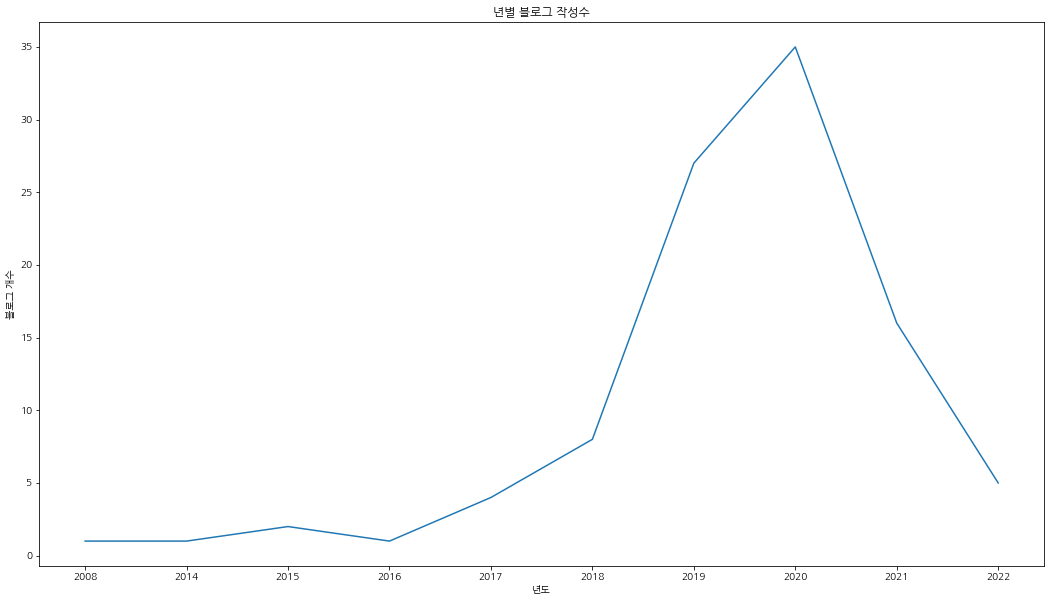

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.title('년별 블로그 작성수')
plt.plot(df_naver['post_year'].value_counts().sort_index().index, df_naver['post_year'].value_counts().sort_index())
plt.xlabel('년도')
plt.ylabel('블로그 개수')
plt.show()


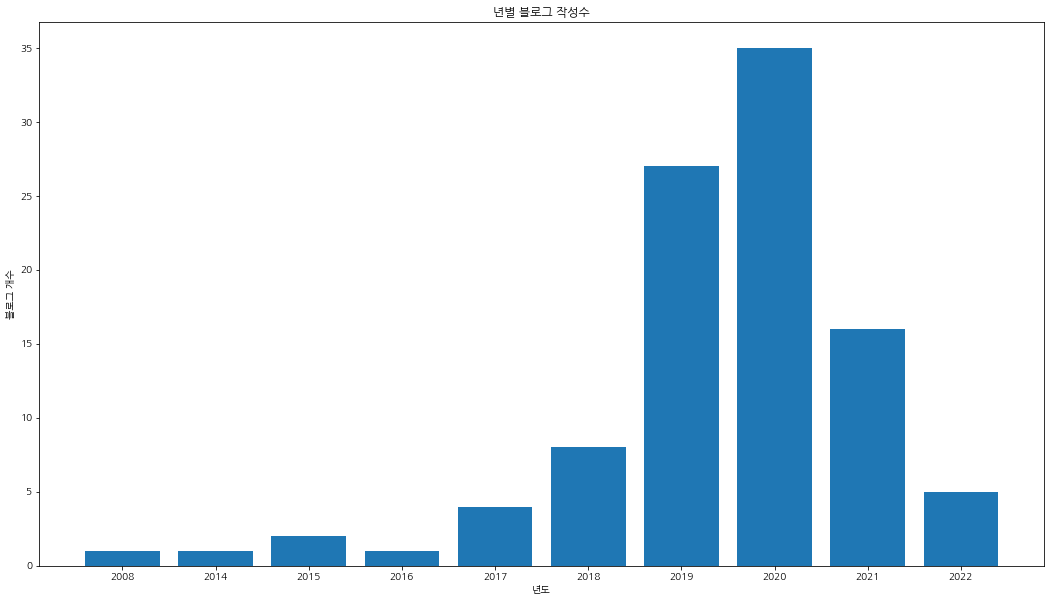

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.title('년별 블로그 작성수')

plt.bar(df_naver['post_year'].value_counts().sort_index().index, df_naver['post_year'].value_counts().sort_index())
plt.xlabel('년도')
plt.ylabel('블로그 개수')
plt.show()


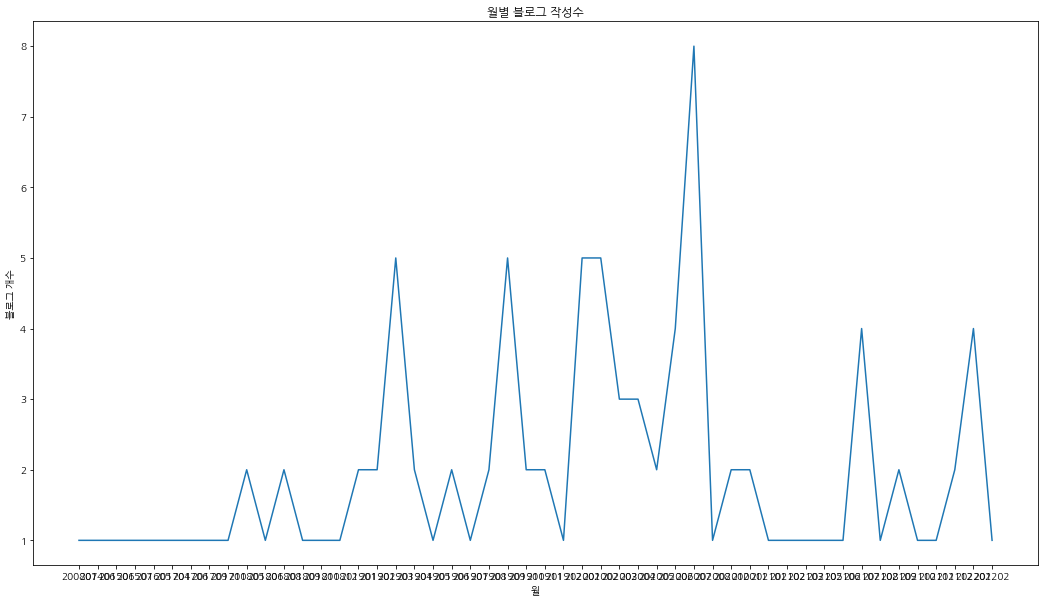

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.title('월별 블로그 작성수')

plt.plot(df_naver['post_month'].value_counts().sort_index().index, df_naver['post_month'].value_counts().sort_index())
plt.xlabel('월')
plt.ylabel('블로그 개수')
plt.show()

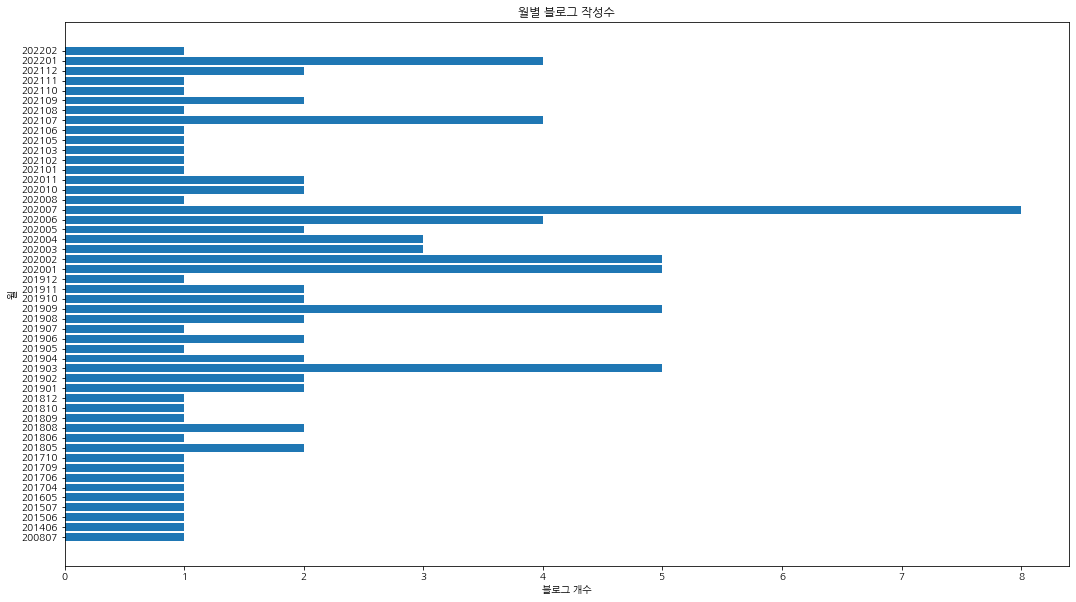

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.title('월별 블로그 작성수')

plt.barh(df_naver['post_month'].value_counts().sort_index().index, df_naver['post_month'].value_counts().sort_index())
plt.xlabel('블로그 개수')
plt.ylabel('월')
plt.show()